# Домашнее задание

## Теоретическая часть

1.	Постройте регрессионное дерево для прогнозирования y с помощью x на обучающей выборке:
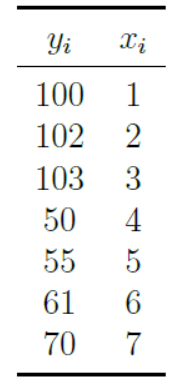
Критерий деления узла на два – минимизация MSE. Узлы делятся до тех пор, пока в узле остаётся больше двух наблюдений.

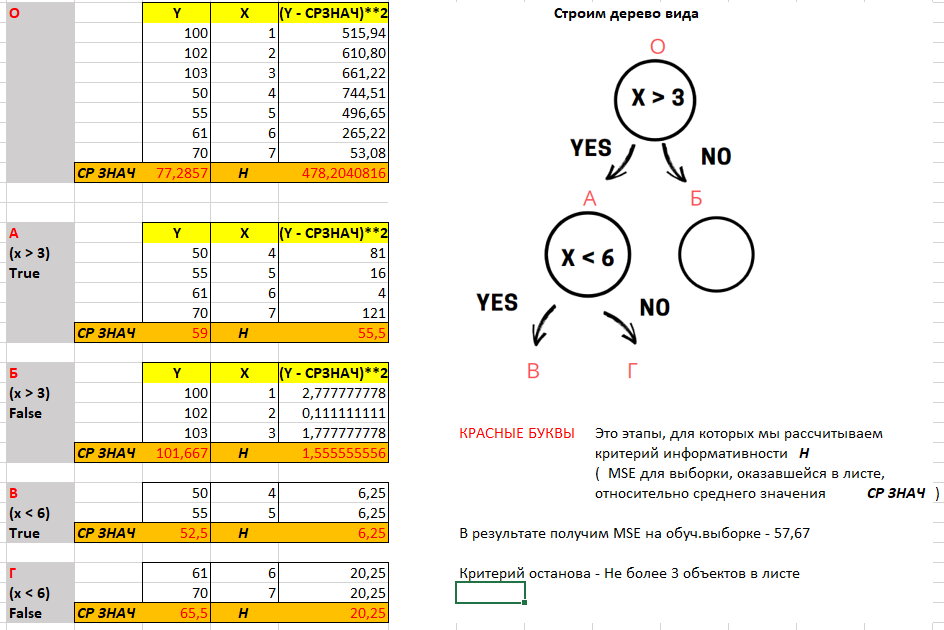

2. Постройте пример, когда индекс Джини больше 0.9999.

3. Машка пять дней гадала на ромашке, а затем выкладывала очередную фотку “Машка с ромашкой” в инстаграмчик. Результат гадания – переменная yi, количество лайков у фотки – переменная xi. Постройте классификационное дерево для прогнозирования yi с помощью xi на обучающей выборке:
![title](task3.png)
Дерево строится до идеальной классификации. Критерий деления узла на два – максимальное падение индекса Джини.

### Оформление решений

Вы можете написать решения задач прямо в ноутбуке, а можете прислать файл с решениями в любом другом читаемом формате. Это может быть скан листочка с решением, но в этом случае убедительная просьба писать разборчиво.

## Практическая часть

### Задание 1 (RandomForest vs DecisionTree)
Поработайте с датасетом Airfoil.

Сначала скачайте датасет по ссылке https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise#.
и разберитесь, что означает каждая колонка и что является целевой переменной.

1) Посчитайте качество DecisionTreeRegressor и RandomForestRegressor на кросс-валидации (используйте метрику MSE или R2).

2*) Попробуйте уменьшить число признаков с помощью какого-либо метода отбора признаков (http://scikit-learn.org/stable/modules/feature_selection.html). Добейтесь увеличения качества RandomForestRegressor на кросс-валидации.

In [3]:
import pandas as pd

In [16]:
columns = [' Frequency, Hz', 'Angle of attack', 'Chord length, m', 
           'Free-stream velocity, m/s', 'displacement thickness, m', 'sound pressure level, db' ]

In [17]:
data = pd.read_csv('airfoil_self_noise.dat', header= None, sep='\t')
print(data.shape)
data.columns = columns
data.head()

(1503, 6)


,"Frequency, Hz",Angle of attack,"Chord length, m","Free-stream velocity, m/s","displacement thickness, m","sound pressure level, db"
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [20]:
y =  data['sound pressure level, db']
X = data.drop(['sound pressure level, db'], axis=1)

### Обучим модели

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold

In [62]:
CV = KFold(shuffle=True, random_state=1108)

In [63]:
cross_val_score(DecisionTreeRegressor(), X, y, cv=CV).mean() #Решающее дерево на кросс-валидации

0.8566641287049105

In [218]:
cross_val_score(RandomForestRegressor(), X, y, cv=CV).mean() ##Случайный лес на кросс-валидации

0.9325937068184244

### Попробуем уменьшить число признаков

In [84]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression, RFE, RFECV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso

In [78]:
## KBest с f_regression
rf_pipe=Pipeline([('KBest', SelectKBest(f_regression, k = 3)), 
                   ('RF', RandomForestRegressor())
                 ])

cross_val_score(rf_pipe, X, y, cv=CV).mean()

0.9126127671836424

In [114]:
## KBest с mutual_info_regression
rf_pipe=Pipeline([('KBest', SelectKBest(mutual_info_regression, k = 3)), 
                   ('RF', RandomForestRegressor())
                 ])

cross_val_score(rf_pipe, X, y, cv=CV).mean()

0.9162044015946066

In [116]:
## RFE
rf_pipe=Pipeline([('RFE', RFE(RandomForestRegressor(), n_features_to_select=3)), 
                   ('RF', RandomForestRegressor())
                 ])

cross_val_score(rf_pipe, X, y, cv=CV).mean()

0.9138238074446969

# Выводы
* Добиться увеличения качества случайного леса не получилось.
* Но видно, что при сокращении числа признаков с 5 до 3 качество падает на метрике $R^2$ на 0,02 (незначительно) 

### Задание 2 (LinearRegression vs Tree-based algorithms)
Примените к BostonDataset линейную регрессию. Сравните ее качество на кросс-валидации с качеством DecisionTreeRegressor и RandomForestRegressor (см. заполненный ноутбук DT_RF_filled).
Какой алгоритм работает лучше?

In [233]:
from sklearn.datasets import load_boston

data = load_boston()
X = data.data
y = data.target

In [261]:
CV = KFold(n_splits=5, shuffle=True, random_state=1108)

In [264]:
cross_val_score(DecisionTreeRegressor(), X,y, cv=CV).mean()

0.7089866002575627

In [265]:
cross_val_score(RandomForestRegressor(), X,y, cv=CV).mean()

0.8485950222164164

Здесь без вариантов, случайный лес работает гораздо лучше

### Задание 3 (Boosting vs Bagging)

Поработайте с датасетом Diabetes. Ваша задача - получить как можно более высокое качество на кросс-валидации.

Вы можете использовать любые известные вам алгоритмы и методы обработки данных, но обязательно попробуйте DecisionTreeRegressor, RandomForestRegressor и GradientBoostingRegressor. Не забудьте подобрать параметры у алгоритмов.

Для RandomForestRegressor и GradientBoostingRegressor с оптимальными параметрами постройте график зависимости качества алгоритмов от количества деревьев.

In [274]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

data = load_diabetes()

X_full = data.data
y_full = data.target

### Обучим стоковые модели

In [280]:
-cross_val_score(DecisionTreeRegressor(), X_full, y_full, cv=CV, scoring='neg_mean_squared_error').mean()

6547.538329928499

In [284]:
-cross_val_score(RandomForestRegressor(), X_full, y_full, cv=CV, scoring='neg_mean_squared_error').mean()

3276.9398632277835

In [285]:
-cross_val_score(GradientBoostingRegressor(), X_full, y_full, cv=CV, scoring='neg_mean_squared_error').mean()

3296.915077228332

Попробуем выжать максимальное качество из последних двух алгоритмов (RF, GBoost)

## RandomForest

In [325]:
from sklearn.model_selection import GridSearchCV

In [326]:
params_rf = {
    'n_estimators': np.arange(10,301,25),
    'max_depth' : [2,3,5,10,None],
    'max_features' : ['auto', 'sqrt']
    }

In [327]:
gridRF = GridSearchCV(RandomForestRegressor(n_jobs=-1, warm_start=True, oob_score=True, random_state=1108), 
                      param_grid=params_rf, 
                      scoring='neg_mean_squared_error', 
                      n_jobs=-1,  
                      cv=CV, 
                      verbose=True)
gridRF.fit(X_full,y_full)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  1.1min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=1108, shuffle=True),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_...rs=100, n_jobs=-1,
                                             oob_score=True, random_state=1108,
                                             verbose=0, 

In [328]:
gridRF.best_params_

{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 185}

In [299]:
gridRF.best_score_

-3140.4139110695214

In [302]:
# Итоговое качество (было 3276)
-cross_val_score(RandomForestRegressor(**gridRF.best_params_), X_full, y_full, cv = CV,scoring='neg_mean_squared_error').mean()

3148.8772077075655

### GradientBoosting

In [316]:
params_gboost = {
    'learning_rate' : [0.1, 0.01, 0.5, 1.5],
    'n_estimators' : [10,20, 50,100, 150, 200],
    'subsample' : [0.5, 0.7, 1.0],
    'criterion' : ['friedman_mse', 'mse'],
}



In [317]:
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=3,
    subsample=1.0,
    max_features=None,

In [318]:
grid_gboost = GridSearchCV(GradientBoostingRegressor(random_state=1108, warm_start=True, verbose=True),
                          param_grid= params_gboost,
                          scoring='neg_mean_squared_error', 
                          n_jobs=-1,  
                          cv=CV, 
                          verbose=True)

grid_gboost.fit(X_full, y_full)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    3.8s


      Iter       Train Loss      OOB Improve   Remaining Time 
         1        5811.4347          49.9888            0.20s
         2        5560.9983          53.0993            0.20s
         3        5712.7859          46.4373            0.20s
         4        5887.1229          53.6851            0.20s
         5        5817.9462          40.5882            0.16s
         6        5419.4473          44.4894            0.16s
         7        5242.1904          50.5991            0.17s
         8        5313.6033          46.9411            0.17s
         9        5147.2039          46.7435            0.17s
        10        5880.8033          39.4470            0.17s
        20        5152.5837          35.8141            0.14s
        30        4323.4528          34.7008            0.13s
        40        4247.9147          23.7157            0.12s
        50        3770.6912          18.8039            0.11s
        60        3834.8519          15.4986            0.10s
       

[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   13.1s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=1108, shuffle=True),
             error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_wei...
                                                 subsample=1.0, tol=0.0001,
                                     

In [319]:
grid_gboost.best_score_

-3146.193322587105

In [320]:
grid_gboost.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.01,
 'n_estimators': 200,
 'subsample': 0.5}

In [321]:
-cross_val_score(GradientBoostingRegressor(**grid_gboost.best_params_), X_full, y_full, cv=CV, scoring='neg_mean_squared_error').mean()

3173.5552733255827

# Выводы

* Значительно увеличить качество не получилось
* В целом, оба алгоритма (RF, GBoost) показали почти одинаковую эффективность

Попробуем объединить результаты работы обоих моделей

In [322]:
from sklearn.ensemble import StackingRegressor

In [333]:
m = StackingRegressor([('gboost', GradientBoostingRegressor(**grid_gboost.best_params_)), 
                  ('rf', RandomForestRegressor(**gridRF.best_params_))], cv = CV, n_jobs=True,  verbose=True)
-cross_val_score(m, X_full, y_full, cv=CV, scoring='neg_mean_squared_error').mean()

[Parallel(n_jobs=True)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=True)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=True)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=True)]: Done   5 out of   5 | elapsed:    1.0s finished
[Parallel(n_jobs=True)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=True)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=True)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=True)]: Done   5 out of   5 | elapsed:    1.0s finished
[Parallel(n_jobs=True)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=True)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=True)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=True)]: Done   5 out of   5 | elapsed:    1.0s finished
[Parallel(n_jobs=True)]: Using backend SequentialBackend w

3144.1810191233008